In [43]:
import pandas as pd

# Increase quality of pictures and font:
import matplotlib as mpl
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 150
mpl.rc('font', family='serif', serif='Garamond')

In [243]:
## Choose dataset:

# SP100:
df = pd.read_csv('sp100_good.csv', delimiter=";")

# Nikkei:
# df = pd.read_csv('nikkei225.csv', delimiter=';')


df['Dates'] = pd.to_datetime(df['Dates'],errors='raise', dayfirst=True)
df.set_index('Dates', inplace=True)

In [6]:
# List of available factors
df.columns

Index(['Name', 'RiskFree', 'LogReturn', 'Last Price', 'Excess Returns',
       'Index Return', 'Index_rf', 'Index Price', 'Difference', 'Diff_rf',
       '6M Momentum', 'RSI 30 Day', 'Change in 3M Momentum', '3M Momentum',
       '1M Momentum', 'Revenue Growth Year over Year', 'EPS - 1 Yr Growth',
       'P/CF', 'CF', 'CF Volatility', 'Dividend Yield',
       'EBIT Growth Year over Year', 'Equity', 'Debt to Equity',
       'Total Debt to EBITDA', 'Change in Total Debt',
       'Change in Current Ratio', 'Current Ratio', 'Change in Quick Ratio',
       'Quick Ratio', 'Change in Capex', 'Capital Expenditures',
       'Enterprise Value/EBITDA Adjusted', 'Capital Expenditure to Sales',
       'Return on Equity', 'Market Cap', 'Change in Profit Margin',
       'Profit Margin', 'Earnings per Share (EPS)', 'EPS Volatility',
       'Bid Ask Spread', 'Beta', 'Price Earnings Ratio (P/E)',
       'Earnings Yield (E/P)', 'Price to Book Ratio', 'Change in BVPS', 'BVPS',
       'Price to Sales Ratio

In [213]:
## Choose factor
factor = '6M Momentum'

In [123]:
# List if dates so I can create df based on month
list(df.index.unique())

[Timestamp('1990-01-31 00:00:00'),
 Timestamp('1990-02-28 00:00:00'),
 Timestamp('1990-03-30 00:00:00'),
 Timestamp('1990-04-30 00:00:00'),
 Timestamp('1990-05-31 00:00:00'),
 Timestamp('1990-06-29 00:00:00'),
 Timestamp('1990-07-31 00:00:00'),
 Timestamp('1990-08-31 00:00:00'),
 Timestamp('1990-09-28 00:00:00'),
 Timestamp('1990-10-31 00:00:00'),
 Timestamp('1990-11-30 00:00:00'),
 Timestamp('1990-12-31 00:00:00'),
 Timestamp('1991-02-28 00:00:00'),
 Timestamp('1991-03-29 00:00:00'),
 Timestamp('1991-04-30 00:00:00'),
 Timestamp('1991-05-31 00:00:00'),
 Timestamp('1991-06-28 00:00:00'),
 Timestamp('1991-07-31 00:00:00'),
 Timestamp('1991-08-30 00:00:00'),
 Timestamp('1991-09-30 00:00:00'),
 Timestamp('1991-10-31 00:00:00'),
 Timestamp('1991-11-29 00:00:00'),
 Timestamp('1991-12-27 00:00:00'),
 Timestamp('1992-02-28 00:00:00'),
 Timestamp('1992-03-27 00:00:00'),
 Timestamp('1992-04-30 00:00:00'),
 Timestamp('1992-05-29 00:00:00'),
 Timestamp('1992-06-30 00:00:00'),
 Timestamp('1992-07-

In [244]:
df = pd.read_csv('sp100_good.csv', delimiter=";")
df['Dates'] = pd.to_datetime(df['Dates'],errors='raise', dayfirst=True)
df.set_index('Dates', inplace=True)

period = input("Choose period: 90s, 2000s, 2010s")

print(period)
if period == '90s':
    df = df['1990-01-31':'1999-12-31']
elif period == '2000s':
    df = df['2000-02-29':'2009-12-26']
elif period == '2010s':
    df = df['2010-02-26':'2018-12-31']

Choose period: 90s, 2000s, 2010s2000s
2000s


In [246]:
# df = df['2010-02-26':'2018-12-31']

# or full period
# df = df['1990-01-31':'2018-12-31']

In [247]:
### Choose factor:
def get_tickers(factor):
    table_f = df.pivot_table(index='Dates', columns='Name', values=[factor])
    
    
    # CHAGNE THESE DEPENDING ON IF YOU WANT TO BUY THE TOP OR BOTTOM STOCKS FOR EACH FACTOR;
    
    # top 10 Stocks: 
    top10 = table_f[(table_f.mean().sort_values().index[-10:])]
    comp10 = list(top10.columns.unique())
    
    # Or lowest: (e.g. if debt, volatility etc.)
#     bottom10 = table_f[(table_f.mean().sort_values().index[:10])]
#     comp10_bottom = list(bottom10.columns.unique())

    
    # Splitting tuple to only companies left in list:
    l, c_list = zip(*comp10)
    return c_list

In [248]:
# Saving the list of top (or bottom) companies:
c_list = get_tickers(factor)

In [249]:
def get_tickers_short(factor):
    table_f = df.pivot_table(index='Dates', columns='Name', values=[factor])
    
    
    # CHAGNE THESE DEPENDING ON IF YOU WANT TO BUY THE TOP OR BOTTOM STOCKS FOR EACH FACTOR;
    
    # top 10 Stocks: 
#     top10 = table_f[(table_f.mean().sort_values().index[-10:])]
#     comp10 = list(top10.columns.unique())

     
    
    # Or lowest: 
    bottom10 = table_f[(table_f.mean().sort_values().index[:10])]
    comp10_bottom = list(bottom10.columns.unique())

    
    
    # Splitting tuple to only companies left in list:
    l, c_list_short = zip(*comp10_bottom)
    return c_list_short

# Saving the list of top (or bottom) companies:
c_list_short = get_tickers_short(factor)

In [250]:
# Top and bottom 10 stocks
print('Top 10: ',get_tickers(factor), '\n Bottom 10: ', get_tickers_short(factor))

Top 10:  ('UNH', 'AMZN', 'V', 'BLK', 'GILD', 'GOOGL', 'BKNG', 'NFLX', 'NVDA', 'MA') 
 Bottom 10:  ('UPS', 'CSCO', 'MS', 'COST', 'ALL', 'COF', 'AGN', 'BRK', 'PM', 'NKE')


In [251]:
def make_returns(c_list):
    # Create a new DF only containing top10 and their Returns:
    df_factor = df[df['Name'].isin(c_list)][['Name','LogReturn']]

    # Table:
    top_table = df_factor.pivot_table(index='Dates', columns='Name', values=['LogReturn'])

    # Weights: (equal-weighted)
    weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

    w_mult = (weights * top_table)

    factor_portRet= w_mult.sum(axis=1)
    return factor_portRet

In [252]:
factor_portRet = make_returns(c_list)

In [253]:
def make_short_returns(c_list):
    # Create a new DF only containing top10 and their Returns:
    df_factor = df[df['Name'].isin(c_list)][['Name','LogReturn']]

    df_factor[['LogReturn']] = df_factor[['LogReturn']]*-1
    # Table:
    top_table = df_factor.pivot_table(index='Dates', columns='Name', values=['LogReturn'])

    # Weights: (equal-weighted)
    weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

    w_mult = (weights * top_table)

    factor_portRet= w_mult.sum(axis=1)
    return factor_portRet

factor_portRet_short = make_short_returns(c_list_short)

In [254]:
### Combine Long-Short in one portfolio

long_short_portfolio = pd.concat([factor_portRet, factor_portRet_short], axis=1)
long_short_portfolio.columns = ['Long', 'Short']

# Create a linear combination of long and short (50-50)
long_short_portfolio['LongShort'] = long_short_portfolio['Long'] * 0.5 + long_short_portfolio['Short'] * 0.5

In [255]:
long_short_portfolio

,Long,Short,LongShort
Dates,,,
2000-02-29,0.091627,0.112804,0.102215
2000-03-31,0.050481,-0.153949,-0.051734
2000-04-01,-0.017011,-0.008058,-0.012534
2000-05-31,-0.034869,0.022186,-0.006341
2000-06-30,0.040795,0.043014,0.041904
...,...,...,...
2009-08-31,0.049162,-0.044800,0.002181
2009-09-26,0.034925,-0.060308,-0.012692
2009-10-30,0.053163,0.015831,0.034497


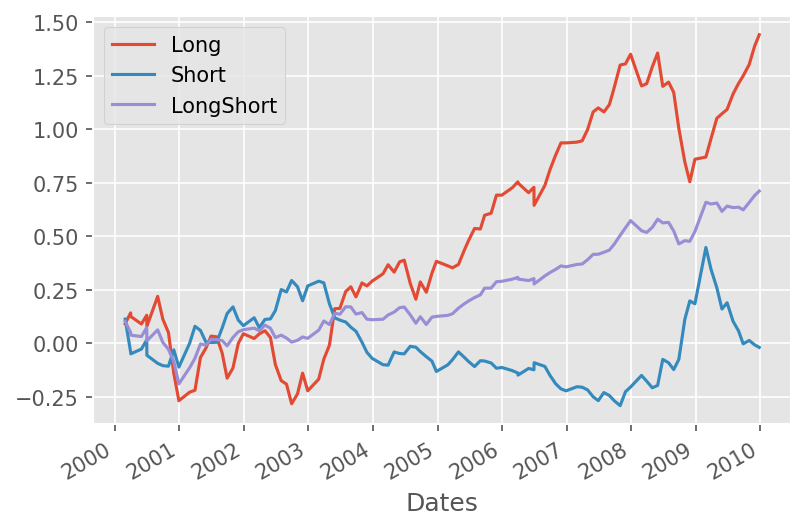

In [256]:
long_short_portfolio.cumsum().plot()

In [258]:
def srRatio(factorReturns):
    # Get Sharpe Ratio of the Portfolio:
    # Monthly:
    SR_m = (factorReturns.mean()/factorReturns.std())
    print("The Average monthly Sharpe Ratio of this Portfolio is: \n",SR_m )
    # Annual:
    import math
    SR_y = ((factorReturns.mean()*12)/(factorReturns.std()*(math.sqrt(12))))
    print("The Average annual Sharpe Ratio of this Portfolio is: \n",SR_y)

srRatio(long_short_portfolio)

The Average monthly Sharpe Ratio of this Portfolio is: 
 Long         0.182331
Short       -0.003035
LongShort    0.193682
dtype: float64
The Average annual Sharpe Ratio of this Portfolio is: 
 Long         0.631614
Short       -0.010514
LongShort    0.670933
dtype: float64
